##           الاسم : هاجر أيمن عبدالله


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, recall_score

## Data collection and preprocessing

In [5]:
health_data = pd.read_csv("healthcare_dataset.csv")
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [7]:
health_data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal
9999,Eric King,20,Male,B-,Arthritis,2023-03-22,Tasha Avila,"Torres, Young and Stewart",Aetna,37223.965865,290,Emergency,2023-04-15,Penicillin,Abnormal


In [9]:
health_data.shape

(10000, 15)

In [11]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [13]:
health_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [15]:
health_data.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [17]:
selected_features = ['Age', 'Gender', 'Blood Type',  'Medical Condition','Date of Admission', 'Insurance Provider', 'Billing Amount', 'Admission Type','Discharge Date', 'Medication', 'Test Results']
healthcare_data = health_data[selected_features]
healthcare_data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal


In [19]:
healthcare_data['Test Results'].value_counts()

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

## Splitting data and labels

In [22]:
x = healthcare_data.drop(columns ='Test Results')
y = healthcare_data['Test Results']

## Checking the distribution of categorical data 

In [25]:
x['Gender'].value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64

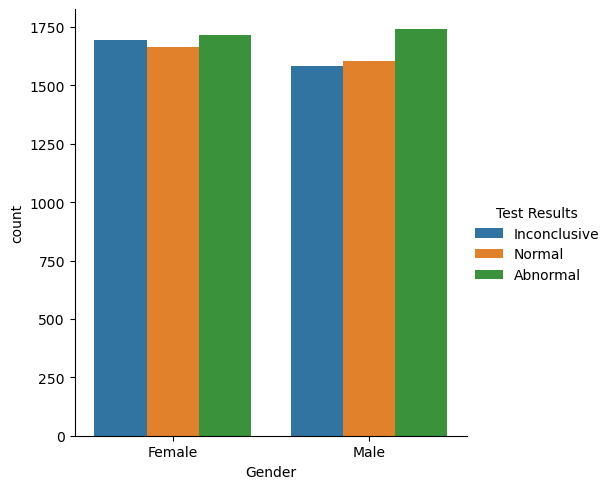

In [32]:
sns.catplot(x= x['Gender'], kind = 'count', hue= y)

In [34]:
x['Blood Type'].value_counts()

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

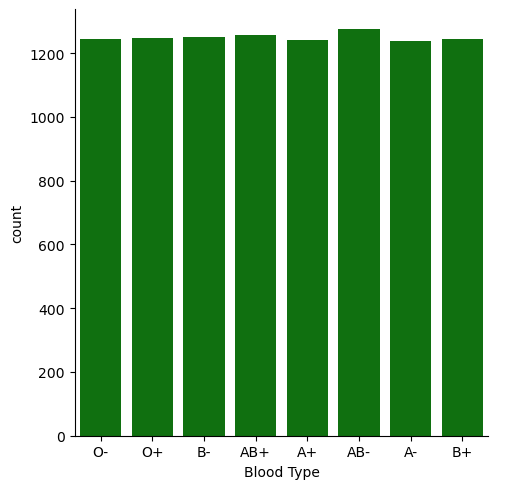

In [36]:
sns.catplot(x= x['Blood Type'], kind = 'count', color = "green")

In [38]:
x['Medical Condition'].value_counts()

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

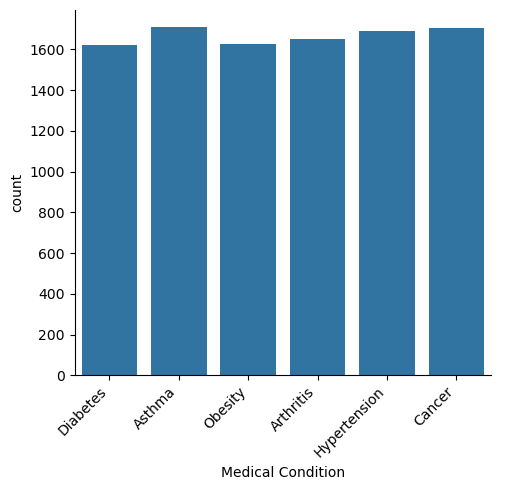

In [40]:
j = sns.catplot(x= x['Medical Condition'], kind = 'count')
j.set_xticklabels(rotation=45, ha='right')  # تدوير 45 درجة مع محاذاة لليمين
plt.tight_layout()

In [42]:
x['Insurance Provider'].value_counts()

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

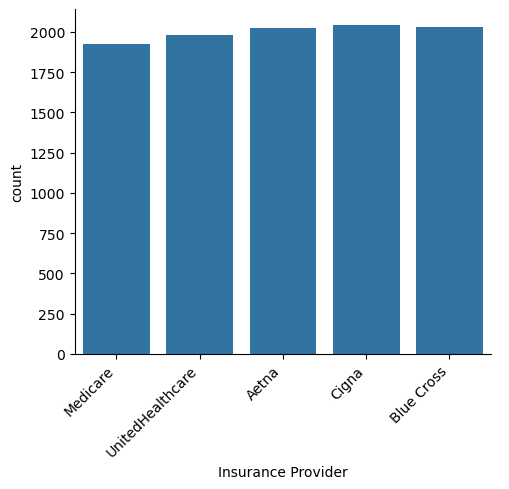

In [44]:
j = sns.catplot(x='Insurance Provider', kind='count', data=x)
j.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()

In [46]:
x['Admission Type'].value_counts()

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

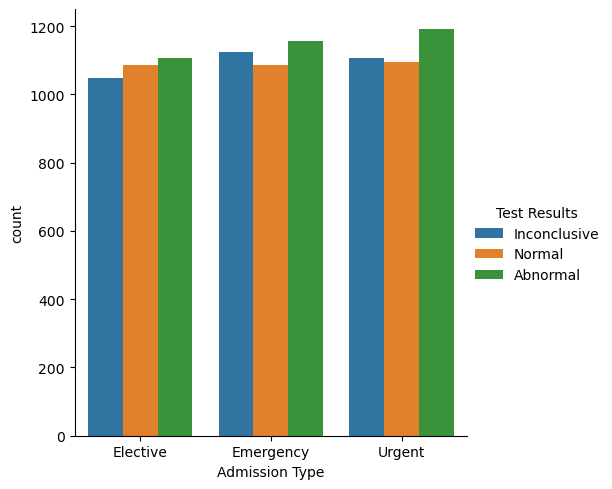

In [48]:
sns.catplot(x= x['Admission Type'], kind = 'count', hue= y)

In [52]:
x['Medication'].value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

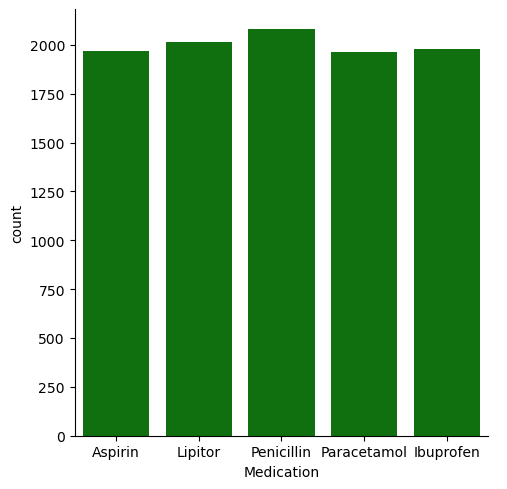

In [54]:
sns.catplot(x= x['Medication'], kind = 'count', color="green")

In [56]:
x.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol


In [58]:
quantative = []
categorical= []
for i in x.columns :
    if len(x[i].unique()) > 15:
        quantative.append(i)
    else:
        categorical.append(i)

In [60]:
quantative

['Age', 'Date of Admission', 'Billing Amount', 'Discharge Date']

In [62]:
categorical

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication']

## Label Encoding for Categorical data

In [72]:
non_numeric = x.select_dtypes(exclude ='number').columns.tolist()

In [74]:
lbl = LabelEncoder()

In [88]:
for i in non_numeric:
    x[i] = lbl.fit_transform(x[i])
    y = lbl.fit_transform(y)

In [90]:
x.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication
0,63,0,7,3,1468,3,7439,0,1476,0
1,17,1,6,1,1664,4,9444,1,1672,2
2,43,1,5,5,71,3,7329,1,96,2
3,31,1,5,1,548,3,4589,2,544,4
4,33,1,7,0,980,4,3469,2,996,3


In [94]:
y

array([1, 2, 2, ..., 2, 2, 0], dtype=int64)

In [ ]:
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])

In [ ]:
healthcare_data['Admission_Year'] = healthcare_data['Date of Admission'].dt.year
healthcare_data['Admission_Month'] = healthcare_data['Date of Admission'].dt.month
healthcare_data['Admission_Day'] = healthcare_data['Date of Admission'].dt.day

healthcare_data['Stay_Duration'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days

In [ ]:
healthcare_data.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

In [ ]:
healthcare_data.head()

### Normalization for quantative data

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[['Age']] = scaler.fit_transform(x[['Age']])
x[['Billing Amount']] = scaler.fit_transform(x[['Billing Amount']])
x[['Date of Admission']] = scaler.fit_transform(x[['Date of Admission']])
x[['Discharge Date']] = scaler.fit_transform(x[['Discharge Date']])

In [150]:
x.head() 

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication
0,0.940299,0,7,3,0.809261,3,0.743974,0,0.805237,0
1,0.253731,1,6,1,0.917310,4,0.944494,1,0.912166,2
2,0.641791,1,5,5,0.039140,3,0.732973,1,0.052373,2
3,0.462687,1,5,1,0.302095,3,0.458946,2,0.296781,4
4,0.492537,1,7,0,0.540243,4,0.346935,2,0.543372,3


### split data into train & test data

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= True, stratify= y, shuffle= True)

In [154]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(10000, 10)
(8000, 10)
(2000, 10)


### Model Training

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
model = XGBClassifier()
model2 = RandomForestClassifier(n_estimators=100, max_depth=10)

In [159]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

In [162]:
y_train_predict = model.predict(x_train)
accuracy_of_train_data = recall_score(y_train, y_train_predict, average='micro')
print("Accuracy of train data: ", accuracy_of_train_data)

Accuracy of train data:  0.905875


In [164]:
y_test_predict = model.predict(x_test)
accuracy_of_test_data = recall_score(y_test, y_test_predict, average= 'micro')
print("Accuracy of test data: ", accuracy_of_test_data)

Accuracy of test data:  0.3495


In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.36      0.39      0.37       691
           1       0.36      0.33      0.34       655
           2       0.33      0.33      0.33       654

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000



### Making a Predictive system

In [136]:
x_new = x_test.iloc[[127]]
prediction = model.predict(x_new)
print(prediction)

if (prediction[0]) == 0:
    print("Test Result is Abnormal")
elif (prediction[0]) == 1:
    print("Test Result is Inconclusive")
elif (prediction[0]) == 2:
    print("Test Result is Normal")

[2]
Test Result is Normal


In [138]:
y_test[127]

2